# IBM Cares Application - Clustering for Employee Sentiment Analysis during lockdown

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [2]:
raw_data = pd.read_csv('Sample_Survey_Data.csv')
raw_data

,RespondentUniqueID,Gender,Age Group,Nationality,BaseCountry,Profession,Marital Status,Dependents,ChronicDisease,Medication,...,SOC1,SOC2,SOC3,SOC4,SOC5,PHY1,PHY2,PHY3,PHY4,PHY5
0,IBM0000001,F,2,AE,UK,4,0,1,0,0,...,2,2,3,3,4,2,2,3,3,4.0
1,IBM0000002,F,3,UK,PK,5,0,0,0,0,...,2,2,3,3,4,2,2,3,3,4.0
2,IBM0000003,M,4,IN,ZA,1,0,0,0,0,...,2,2,3,3,3,2,2,3,3,NaN
3,IBM0000004,M,1,PK,ZA,2,1,0,0,0,...,4,3,2,1,1,4,3,2,1,1.0
4,IBM0000005,M,2,BN,ZA,5,1,0,0,0,...,2,3,4,1,3,5,4,3,2,1.0
5,IBM0000006,F,3,SA,ZA,3,1,1,1,1,...,3,1,2,5,2,5,2,3,4,1.0
6,IBM0000007,M,4,ZA,UK,4,1,1,0,0,...,2,3,2,5,4,5,3,1,2,5.0
7,IBM0000008,F,1,AE,ZA,3,1,1,1,1,...,3,2,1,1,3,1,3,2,2,3.0
8,IBM0000009,M,2,UK,IN,2,0,0,1,1,...,3,3,4,2,4,3,5,4,3,2.0
9,IBM0000010,M,3,IN,ZA,1,1,1,0,0,...,3,3,3,2,4,2,2,3,3,4.0


In [8]:
#Copy into a separate dataframe for further calculations
data_avg = raw_data.copy()

#Avrege out Professional Satisfaction
cols_prf = ['PRF1','PRF2','PRF3', 'PRF4', 'PRF5']
data_avg['average_PRF'] = data_avg[cols_prf].astype(float).mean(axis=1)

#Avrege out Professional Emotional Satisfaction
cols_em = ['EM1','EM2','EM3', 'EM4', 'EM5']
data_avg['average_em'] = data_avg[cols_em].astype(float).mean(axis=1)

#Avrege out Pschyocological Satisfaction
cols_psy = ['PSY1','PSY2','PSY3', 'PSY4', 'PSY5']
data_avg['average_psy'] = data_avg[cols_psy].astype(float).mean(axis=1)

#Avrege out Social Satisfaction
cols_soc = ['SOC1','SOC2','SOC3', 'SOC4', 'SOC5']
data_avg['average_soc'] = data_avg[cols_soc].astype(float).mean(axis=1)

#Avrege out Physical Satisfaction
cols_phy = ['PHY1','PHY2','PHY3', 'PHY4', 'PHY5']
data_avg['average_phy'] = data_avg[cols_phy].astype(float).mean(axis=1) 

In [9]:
data_avg

,RespondentUniqueID,Gender,Age Group,Nationality,BaseCountry,Profession,Marital Status,Dependents,ChronicDisease,Medication,...,PHY1,PHY2,PHY3,PHY4,PHY5,average_PRF,average_em,average_psy,average_soc,average_phy
0,IBM0000001,F,2,AE,UK,4,0,1,0,0,...,2,2,3,3,4.0,2.8,2.8,2.8,2.8,2.8
1,IBM0000002,F,3,UK,PK,5,0,0,0,0,...,2,2,3,3,4.0,2.6,2.8,2.8,2.8,2.8
2,IBM0000003,M,4,IN,ZA,1,0,0,0,0,...,2,2,3,3,NaN,3.6,2.6,2.5,2.6,2.5
3,IBM0000004,M,1,PK,ZA,2,1,0,0,0,...,4,3,2,1,1.0,3.8,2.2,2.2,2.2,2.2
4,IBM0000005,M,2,BN,ZA,5,1,0,0,0,...,5,4,3,2,1.0,3.8,2.8,3.0,2.6,3.0
5,IBM0000006,F,3,SA,ZA,3,1,1,1,1,...,5,2,3,4,1.0,3.8,2.4,3.0,2.6,3.0
6,IBM0000007,M,4,ZA,UK,4,1,1,0,0,...,5,3,1,2,5.0,3.8,3.0,3.8,3.2,3.2
7,IBM0000008,F,1,AE,ZA,3,1,1,1,1,...,1,3,2,2,3.0,3.6,2.5,2.8,2.0,2.2
8,IBM0000009,M,2,UK,IN,2,0,0,1,1,...,3,5,4,3,2.0,3.8,2.8,2.6,3.2,3.4
9,IBM0000010,M,3,IN,ZA,1,1,1,0,0,...,2,2,3,3,4.0,3.8,2.8,2.6,3.0,2.8


In [15]:
#Only averages in a data frame
data_only_avg = data_avg.copy()

#drop all other columns
data_only_avg.drop(data_only_avg.iloc[:, 10:35], inplace = True, axis = 1)

data_only_avg

,RespondentUniqueID,Gender,Age Group,Nationality,BaseCountry,Profession,Marital Status,Dependents,ChronicDisease,Medication,average_PRF,average_em,average_psy,average_soc,average_phy
0,IBM0000001,F,2,AE,UK,4,0,1,0,0,2.8,2.8,2.8,2.8,2.8
1,IBM0000002,F,3,UK,PK,5,0,0,0,0,2.6,2.8,2.8,2.8,2.8
2,IBM0000003,M,4,IN,ZA,1,0,0,0,0,3.6,2.6,2.5,2.6,2.5
3,IBM0000004,M,1,PK,ZA,2,1,0,0,0,3.8,2.2,2.2,2.2,2.2
4,IBM0000005,M,2,BN,ZA,5,1,0,0,0,3.8,2.8,3.0,2.6,3.0
5,IBM0000006,F,3,SA,ZA,3,1,1,1,1,3.8,2.4,3.0,2.6,3.0
6,IBM0000007,M,4,ZA,UK,4,1,1,0,0,3.8,3.0,3.8,3.2,3.2
7,IBM0000008,F,1,AE,ZA,3,1,1,1,1,3.6,2.5,2.8,2.0,2.2
8,IBM0000009,M,2,UK,IN,2,0,0,1,1,3.8,2.8,2.6,3.2,3.4
9,IBM0000010,M,3,IN,ZA,1,1,1,0,0,3.8,2.8,2.6,3.0,2.8


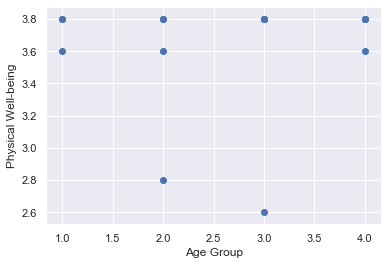

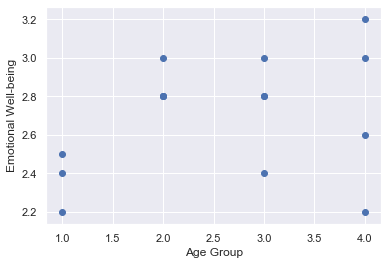

In [20]:
plt.scatter(data_only_avg['Age Group'], data_only_avg['average_PRF'])
plt.xlabel('Age Group')
plt.ylabel('Physical Well-being')
plt.show()

plt.scatter(data_only_avg['Age Group'], data_only_avg['average_em'])
plt.xlabel('Age Group')
plt.ylabel('Emotional Well-being')
plt.show()